# Exploratory data analysis (EDA): feature engineering and feature selection

**Author:** Y.X. Wu


In [ ]:
from utils.FeatureCalculator import FeatureCalculator
import numpy as np
import pandas as pd
import os

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../Dataset_Cleaned/'
display(os.path.isfile(data_path+'LiteratureDataset_Corrosion_YW_v3.xlsx'))

## Feature engineering

### Feature Calculation for Alloy Components

Prepares and processes data about alloy compositions, specifically it creates a `FeatureCalculator` object from the defined compositions, then calculates and prints the corresponding alloy features.

Zhou, et al., npj Computational Materials (2019)5:128 ; https://doi.org/10.1038/s41524-019-0265-1

| Engineered feature parameters                         | Formula                                                                                          |
| ----------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| Mean atom radius                                      | $a=\sum_{i=1}^n c_i r_i$                                                                         |
| Atomic size difference                                | $\delta=\sqrt{\sum_{i=1}^n c_i\left(1-\frac{r_i}{a}\right)^2}$                                   |
| Average of the melting points of constituent elements | $T_m=\sum_{i=1}^n c_i T_{m i}$                                                                   |
| Standard deviation of melting temperature             | $\sigma_T=\sqrt{\sum_{i=1}^n c_i\left(1-\frac{T_i}{T_m}\right)^2}$                               |
| Average mixing enthalpy                               | $\Delta H_{\text {mix }}=4 \sum_{i \neq j} c_i c_j H_{i j}$                                      |
| Standard deviation of mixing enthalpy                 | $\sigma_{\Delta H}=\sqrt{\sum_{i \neq j} c_i c_j\left(H_{i j}-\Delta H_{\text {mix }}\right)^2}$ |
| Ideal mixing entropy                                  | $S_{i d}=-k_B \sum_{i=1}^n c_i \ln c_i$                                                          |
| Electronegativity                                     | $X=\sum_{i=1}^n c_i X_i$                                                                         |
| Standard deviation of electronegativity               | $\Delta x=\sqrt{\sum_{i=1}^n c_i\left(X_i-X\right)^2}$                                           |
| Average VEC                                           | $V E C=\sum_{i=1}^n c_i V E C_i$                                                                 |
| Standard deviation of VEC                             | $\sigma_{V E C}=\sqrt{\sum_{i=1}^n c_i\left(V E C_i-V E C\right)^2}$                             |
| Mean bulk modulus                                     | $K=\sum_{i=1}^n c_i K_i$                                                                         |
| Standard deviation of bulk modulus                    | $\sigma_K=\sqrt{\sum_{i=1}^n c_i\left(K_i-K\right)^2}$                                           |


simple examples to use the `FeatureCalculator` object


In [ ]:
# Define a list of component elements and their corresponding fractions
compo_elem = ["Ni", "Cr", "Mo", "Ti", "Fe"]
ele_frac = np.array([43.8, 38.3, 2.44, 1.04, 0])

# Create a dictionary mapping each element to its corresponding fraction,
ele_frac_dict = {elem: frac for elem, frac in zip(compo_elem, ele_frac)}

# Prepare data in the format required for FeatureCalculator - a list of tuples,
# where each tuple contains a list of elements and their corresponding fractions
compositions = [(list(ele_frac_dict.keys()), list(ele_frac_dict.values()))]

print(compositions)

# Create a FeatureCalculator object with the prepared compositions
calculator = FeatureCalculator(compositions)

# Calculate the features using the FeatureCalculator object
features = calculator.calculate_features()


feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]
# tabulate the features the feature under feature_names
df = pd.DataFrame(features, columns=feature_names)
display(df)

### Data Loading, Feature Calculation, and Extraction

Reads various datasets from Excel files, calculates specific features for each material composition in these datasets using a custom `FeatureCalculator` class, extracts relevant data from the corrosion and hardness datasets, and displays the first rows of the extracted data.


In [41]:
import pandas as pd
from utils.FeatureCalculator import FeatureCalculator

# Initialization of the constants and the data to be loaded
feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]

# Lists of filenames, elements for each file, and the header rows for the data in each file
data_file_names = ["LiteratureDataset_Corrosion_YW_v3.xlsx",
                   "LiteratureDataset_Hardness_YW_v3.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_at_pct.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_wt_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_at_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_wt_pct.xlsx"]
element_columns = [['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y'],
                   ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']]

df_header_list = [2, 2, 0, 0, 0, 0, 0, 0]
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                                 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
features_dfs = []

# Processing each data file along with the corresponding elements
for i in range(len(data_file_names)):
    # Load and preprocess data from each excel file
    data_df = pd.read_excel(
        data_path + data_file_names[i], header=df_header_list[i])
    # print(data_df.columns)
    element_fractions = data_df[element_columns[i]].fillna(0)

    # Calculate features for each composition
    compositions = [(element_columns[i], element_fraction)
                    for element_fraction in element_fractions.values]
    feature_calculator = FeatureCalculator(compositions)
    calculated_features = feature_calculator.calculate_features()

    # Store the calculated features in a DataFrame
    features_df = pd.DataFrame(calculated_features, columns=feature_names)
    features_dfs.append(features_df)

    # Extract and store specific data and features for the corrosion and hardness datasets
    if i == 0:  # Corrosion dataset
        df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output = element_fractions, data_df[[
            'TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']], features_df, data_df[['AvgPittingPotential_mV']]

        # now I want to make df_C_compo have the same columns as df_compo
        df_C_compo = pd.concat([df_C_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_C_compo.head(1))

    if i == 1:  # Hardness dataset
        df_H_compo, df_H_specific_features, df_H_output = element_fractions, features_df, data_df[[
            'converted HV']]
        df_H_compo = pd.concat([df_H_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_H_compo.head(1))


# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
display(df_C_compo.head(1), df_C_specific_testing.head(1),
        df_C_specific_features.head(1), df_C_output.head(1))
display(df_H_compo.head(1), df_H_specific_features.head(1), df_H_output.head(1))

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,TestTemperature_C,ChlorideIonConcentration,pH,ScanRate_mVs
0,50.0,0.005133,7.8,0.1


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,124.30836,9.9,186465.714,1.846011e+06,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589


,AvgPittingPotential_mV
0,287.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,126.69848,9.900001,179579.93,1.777843e+06,-42038.7456,2.657898e+06,-299.679129,177.0884,1753.175704,806.21,7981.49141,1.625460e+13,160920.693702


,converted HV
0,140.913294


### Visualizing Correlation Matrix and Correlation with the Target Variable

Generates two visuals: a heatmap showing the correlation between all features in the data set, and a bar chart indicating the correlation of each feature with the target variable, 'AvgPittingPotential_mV'. These visuals help in identifying the relationships between different features, and how each one impacts the target variable.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate DataFrames
df_C = pd.concat([df_C_compo, df_C_specific_testing,
                 df_C_specific_features, df_C_output], axis=1)
display(df_C.head(1))

# Compute absolute correlation matrix
corr_matrix_C = df_C.corr().abs()

# Remove NaN columns and rows
corr_matrix_C = corr_matrix_C.loc[:, ~corr_matrix_C.isna().all(axis=0)]
corr_matrix_C = corr_matrix_C.loc[~corr_matrix_C.isna().all(axis=1), :]

# Create a mask with True in all the cells. We'll only set the diagonal to False in the next step.
mask = np.triu(np.ones_like(corr_matrix_C, dtype=bool))

# Set the diagonal to False (these are the cells we want to keep)
np.fill_diagonal(mask, False)

# Plot correlation heatmap
plt.figure(figsize=(15, 15), dpi=150)
sns.heatmap(corr_matrix_C, mask = mask, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})
plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Compute and plot correlations with the target variable
plt.figure(figsize=(15, 5), dpi=150)
df_C.drop('AvgPittingPotential_mV', axis=1).apply(lambda x: x.corr(
    df_C['AvgPittingPotential_mV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the AvgPittingPotential_mV")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Concatenate DataFrames
df_H = pd.concat([df_H_compo, df_H_specific_features, df_H_output], axis=1)

# Compute absolute correlation matrix
corr_matrix_H = df_H.corr().abs()

# Remove NaN columns and rows
corr_matrix_H = corr_matrix_H.loc[:, ~corr_matrix_H.isna().all(axis=0)]
corr_matrix_H = corr_matrix_H.loc[~corr_matrix_H.isna().all(axis=1), :]

# Create a mask with True in all the cells. We'll only set the diagonal to False in the next step.
mask = np.triu(np.ones_like(corr_matrix_H, dtype=bool))

# Set the diagonal to False (these are the cells we want to keep)
np.fill_diagonal(mask, False)

# Plot correlation heatmap
plt.figure(figsize=(15, 15), dpi=150)

# Use the mask in the heatmap
sns.heatmap(corr_matrix_H, mask=mask, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})

plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Compute and plot correlations with the target variable
plt.figure(figsize=(15, 5), dpi=150)
df_H.drop('converted HV', axis=1).apply(lambda x: x.corr(
    df_H['converted HV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the converted HV")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()


## Feature selection

### Data Normalization

performs MinMax scaling on multiple datasets to prepare them as inputs for a Neural Network, concatenates certain scaled datasets for model training


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Prepare data for NN
dfs = [df_H_compo, df_H_specific_features, df_H_output,
       df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output]

# Convert DataFrames to numpy arrays
inputs_outputs = [np.asarray(df.values) for df in dfs]

# Define each variable
X1, Y1, H1, X2, Z2, W2, C2 = inputs_outputs

# Initialize MinMaxScalers for each data set
scalers = {
    "compo": MinMaxScaler(),
    "H_specific_features": MinMaxScaler(),
    "H_output": MinMaxScaler(),
    "C_specific_testing": MinMaxScaler(),
    "C_specific_features": MinMaxScaler(),
    "C_output": MinMaxScaler()
}

# Fit scalers to appropriate data
scalers["compo"].fit(np.concatenate((X1, X2)))
scalers["H_specific_features"].fit(Y1)
scalers["H_output"].fit(H1.reshape((-1, 1)))
scalers["C_specific_testing"].fit(Z2)
scalers["C_specific_features"].fit(W2)
scalers["C_output"].fit(C2.reshape((-1, 1)))

# Apply transformations
X1_norm = scalers["compo"].transform(X1)
Y1_norm = scalers["H_specific_features"].transform(Y1)
H1_norm = scalers["H_output"].transform(H1.reshape((-1, 1)))

X2_norm = scalers["compo"].transform(X2)
Z2_norm = scalers["C_specific_testing"].transform(Z2)
W2_norm = scalers["C_specific_features"].transform(W2)
C2_norm = scalers["C_output"].transform(C2.reshape((-1, 1)))

# Prepare final input data for model training
X_H_norm = np.concatenate((X1_norm, Y1_norm), axis=1)
X_C_norm = np.concatenate((X2_norm, Z2_norm, W2_norm), axis=1)

# Plot distribution of target variables
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(1, 2, 1)
plt.hist(W2_norm[:, 2], bins=50)  # Distribution of one of the features

plt.subplot(1, 2, 2)
plt.hist(C2_norm, bins=50)  # Distribution of target variable
plt.show()

### Building and Evaluating Random Forest Regression Models

trains and evaluates a Random Forest Regression model using 6-fold cross-validation on two sets of normalized data ('H' and 'C'), outputting the R^2 scores for each fold and their means.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

kf = KFold(n_splits=6, random_state=0, shuffle=True)

def train_and_evaluate(X, y, model_name):
    models, scores = [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.ravel()[
            train_index], y.ravel()[test_index]

        model = RandomForestRegressor(random_state=0,
                                      n_estimators=300,
                                      max_features=20,
                                      max_depth=10,
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      bootstrap=True)
        model.fit(X_train, y_train)
        models.append(model)
        scores.append(r2_score(y_test, model.predict(X_test)))

    # print the model performance mean and std
    print(f"{model_name} R^2 scores Mean: {np.mean(scores)} Std: {np.std(scores)}")
    return models


models_H = train_and_evaluate(X_H_norm, H1_norm, 'H')
models_C = train_and_evaluate(X_C_norm, C2_norm, 'C')

In [29]:
print(models_H[0])

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=5, random_state=0)


### Random Forest Hyperparameter Tuning

performs hyperparameter tuning and training of Random Forest Regressor models using K-fold cross-validation, evaluates model performance with R^2 scores, and calculates permutation feature importance for two target variables ('H' and 'C') with the same input features.

for the small dataset and I will only split into train and test data based on cross-validation: model score + feature importance are evaluated based on the test data.

be careful with overfitting: comparing the model score of the training data and the test data


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Set up the k-fold cross-validation
kf = KFold(n_splits=6, random_state=0, shuffle=True)

# Define a function to create, train, and evaluate a Random Forest model
def hyperevaluate_train_model(X, y, model_name):
    (models, scores_train, scores_test, 
     permu_importances_train, permu_importances_test) = [], [], [], [], []

    param_distributions = {
        'n_estimators': [50, 100, 150], # less trees to reduce overfitting
        'max_features': [1, 'log2', 'sqrt'], 
        'max_depth': [4, 6, 8], # smaller to reduce overfitting
        'min_samples_split': [5, 10, 15], # larger to reduce overfitting 
        'min_samples_leaf': [6, 8, 10], # larger to reduce overfitting
        # 'bootstrap': [True, False]
    }

    rf = RandomForestRegressor(random_state=0)
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                       n_iter=100, cv=kf, scoring='r2', verbose=0, random_state=0, n_jobs=-1)
    # the model uses the KFold to estimate the average r2 score by testing dataset
    random_search.fit(X, y.ravel())

    print(f"Best parameters for {model_name}:", random_search.best_params_)
    print(f"Best score for {model_name}:", random_search.best_score_)

    # Now with best parameters, train and evaluate
    for train_index, test_index in kf.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.ravel()[
            train_index], y.ravel()[test_index]

        # Now build model with best parameters
        model_best = RandomForestRegressor(
            **random_search.best_params_, random_state=0)
        model_best.fit(X_train, y_train)

        models.append(model_best)
        scores_train.append(r2_score(y_train, model_best.predict(X_train)))
        scores_test.append(r2_score(y_test, model_best.predict(X_test)))

        # Calculate permutation feature importance
        permu_importance_train = permutation_importance(
            model_best, X_train, y_train, n_repeats=50, random_state=42, n_jobs=-1)
        permu_importances_train.append(permu_importance_train)
        
        permu_importance_test = permutation_importance(
            model_best, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1)
        permu_importances_test.append(permu_importance_test)


    print(f"{model_name} R^2 scores_train Mean: {np.mean(scores_train)}, Std: {np.std(scores_train)}")
    print(f"{model_name} R^2 scores_test Mean: {np.mean(scores_test)}, Std: {np.std(scores_test)}")
    print(f"--------------------------------------------------")
    return models, random_search.best_params_, permu_importances_train, permu_importances_test


# Use the function to create, evaluate both models, and calculate importances
(models_H, models_H_best_params, permu_importances_train_H, permu_importances_test_H) = hyperevaluate_train_model(X_H_norm, H1_norm, 'H')
(models_C, models_C_best_params, permu_importances_train_C, permu_importances_test_C) = hyperevaluate_train_model(X_C_norm, C2_norm, 'C')

Generate a set of four subplots displaying box plots overlapped with error bars, showing permutation feature importances across different datasets (Train H, Test H, Train C, Test C), each derived from 6-fold cross-validation.

Compare the permutation feature importances between training data and testing data


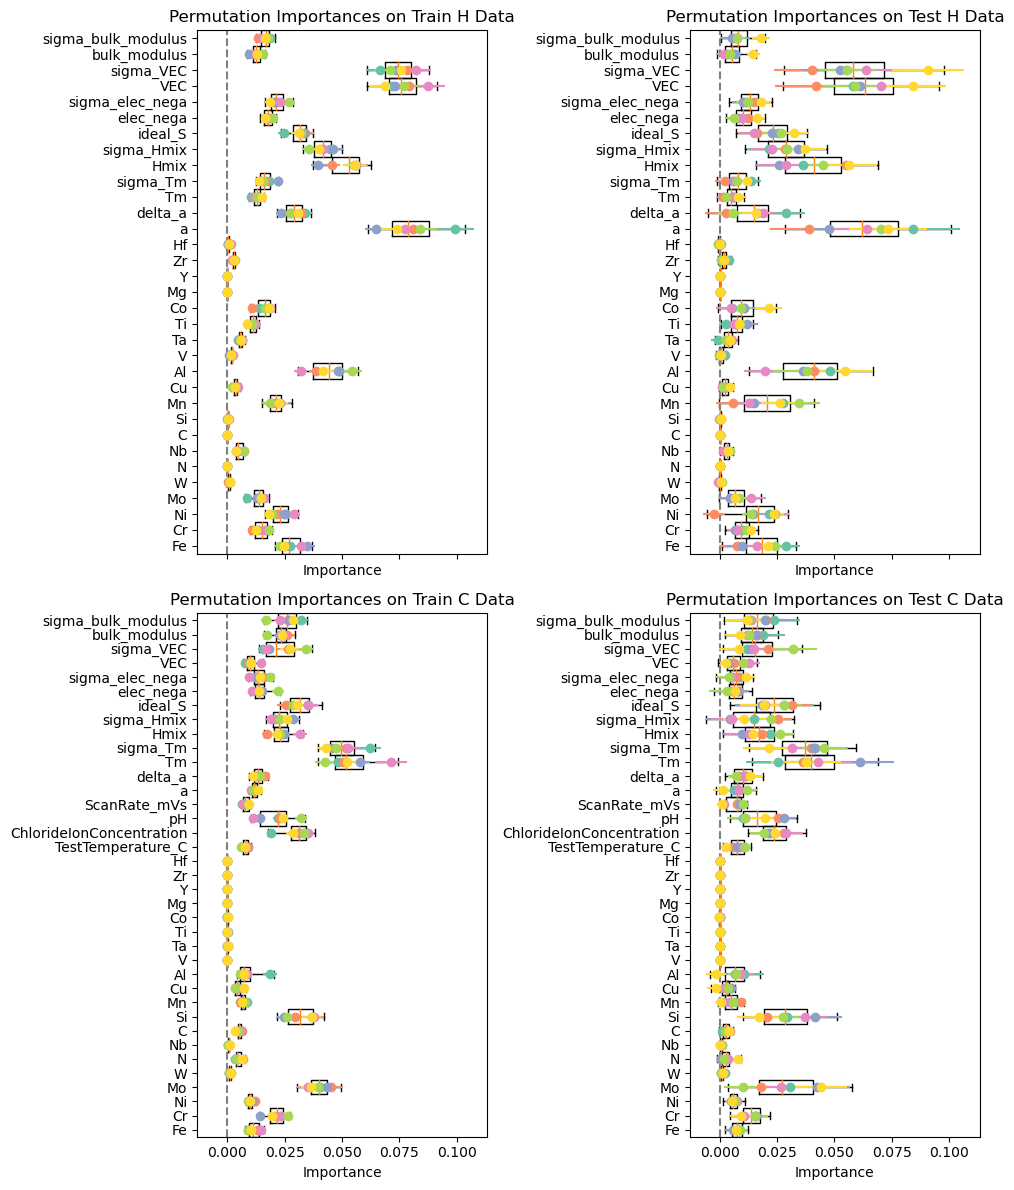

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 12), sharex=True)

# create a color palette of 6 colors using seaborn
colors = sns.color_palette("Set2", 6)

# Data for subplots
datasets = [
    (permu_importances_train_H, 'Train H'),
    (permu_importances_test_H, 'Test H'),
    (permu_importances_train_C, 'Train C'),
    (permu_importances_test_C, 'Test C')
]

feature_names_list = [
    df_H_compo.columns.append(df_H_specific_features.columns).tolist(),
    df_H_compo.columns.append(df_H_specific_features.columns).tolist(),
    df_C_compo.columns.append(df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist(),
    df_C_compo.columns.append(df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist()
]

# Create each subplot
for ax, (permu_importances, data_label), feature_names in zip(axs.ravel(), datasets, feature_names_list):
    
    importances_df_Kfold = pd.DataFrame()

    for i in range(0, 6):
        importances_df = pd.DataFrame(permu_importances[i].importances.T, columns=feature_names)
        # display(importances_df)
        
        importances_df_Kfold = pd.concat([importances_df_Kfold, importances_df], axis=0)

        means = importances_df.mean()
        errors = importances_df.std()
        for j, mean_val in enumerate(means):
            ax.errorbar(mean_val, j, xerr=errors[j], marker='o', color=colors[i], zorder=2)
    
    # print(importances_df_Kfold.shape)
    
    # now overlap the boxplot from the importances_df_Kfold 
    ax.boxplot(importances_df_Kfold, vert=False, whis=[5, 95], positions=range(len(importances_df_Kfold.columns)), showfliers=False, widths=1, zorder=1)
    ax.axvline(x=0, linestyle='--', color='grey', zorder=1)
    ax.set_yticks(range(len(importances_df_Kfold.columns)))
    ax.set_yticklabels(importances_df_Kfold.columns)
    ax.set_xlabel('Importance')
    ax.set_title(f'Permutation Importances on {data_label} Data')

plt.tight_layout()
plt.show()

### Recursive Feature Elimination to select features


1. RFECV begins by training the model on all available features and computes a cross-validated score. This score is a measure of the model's predictive performance.
2. RFECV then eliminates one or more of the least important features (as determined by feature importances that the model provides). The model is retrained on the remaining features, and the cross-validated score is computed again.
3. This process of eliminating features, retraining the model, and computing the score continues until all features have been eliminated.
4. At the end of this process, RFECV has a record of the cross-validated score for each subset of features. It then selects the subset that provided the highest score.


In [39]:
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# let's deal with model_H first 
fixed_features_H = df_H_compo.columns.tolist()
elimination_features_H = df_H_specific_features.columns.tolist()

df_H_rfe = pd.concat([pd.DataFrame(X1_norm, columns=fixed_features_H), 
                      pd.DataFrame(Y1_norm, columns=elimination_features_H)], axis=1)

# Define a pipeline for the elimination features
elimination_pipeline = Pipeline(steps=[
    ('rfecv', RFECV(estimator=RandomForestRegressor(**models_H_best_params, random_state=0), 
                     cv=6, scoring='r2', verbose=False, n_jobs=-1))
])

# Define a preprocessor that applies the elimination pipeline to the elimination features,
# and does nothing to the fixed features (since they are already preprocessed)
preprocessor = make_column_transformer(
    ('passthrough', fixed_features_H),
    (elimination_pipeline, elimination_features_H)
)

# Define the final pipeline that includes preprocessing and model training
pipeline_H = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reg', RandomForestRegressor(**models_H_best_params, random_state=0))
])

# Fit the pipeline to the all data
X_H_norm_rfe = df_H_rfe[fixed_features_H + elimination_features_H]
H1_norm_rfe = H1_norm.ravel()
 
pipeline_H.fit(X_H_norm_rfe, H1_norm_rfe)

# Access the mask of selected features from the RFECV step in the pipeline.
selected_features_mask_H = pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].support_
selected_features_H = np.array(elimination_features_H)[selected_features_mask_H]

# Print the selected features.
print(f'all engineered features: {elimination_features_H}')
print(f'Selected features: {selected_features_H}')

# Create a range representing the number of features from 1 to the total number of features in the elimination set.
num_features = range(1, len(pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score']) + 1)

plt.figure()

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")

# Create an errorbar plot. The mean cross-validation score and its standard deviation are obtained from the `cv_results_` attribute of RFECV.
plt.errorbar(num_features,
             pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score'],
             yerr=pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['std_test_score'],
             fmt='o-', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['Fe', 'Cr', 'Ni', 'Mo', 'W',
                                                   'N', 'Nb', 'C', 'Si', 'Mn',
                                                   'Cu', 'Al', 'V', 'Ta', 'Ti',
                                                   'Co', 'Mg', 'Y', 'Zr',
                                                   'Hf']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('rfecv',
                                                                   RFECV(cv=6,
                                                                         estimator=RandomForestRegressor(max_depth=8,
                                                                                                         max_features='sqrt',
                                                                                                         min_samples_leaf=6,
                                                                                                         min_samples_split=5,
                                                                                                         random_state=0),
                                                                         n_jobs=-1,
                                                                         scoring='r2',
                                                                         verbose=False))]),
                                                  ['a', 'delta_a', 'Tm',
                                                   'sigma_Tm', 'Hmix',
                                                   'sigma_Hmix', 'ideal_S',
                                                   'elec_nega',
                                                   'sigma_elec_nega', 'VEC',
                                                   'sigma_VEC', 'bulk_modulus',
                                                   'sigma_bulk_modulus'])])),
                ('reg',
                 RandomForestRegressor(max_depth=8, max_features='sqrt',
                                       min_samples_leaf=6, min_samples_split=5,
                                       random_state=0))])

In [49]:
df_C_feature_rfe = pd.concat([pd.DataFrame(np.concatenate([X2_norm, Z2_norm], axis =1), columns=fixed_features_C), 
                      pd.DataFrame(W2_norm, columns=elimination_features_H)], axis=1)
display(df_C_feature_rfe)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,0.697700,0.18000,0.1,0.0,0.0,0.0,0.0,0.071429,0.071429,0.025214,...,0.474488,0.813560,7.344869e-02,0.472540,0.363259,0.363259,0.685178,0.685179,0.597676,0.597677
1,0.697700,0.18000,0.1,0.0,0.0,0.0,0.0,0.071429,0.071429,0.025214,...,0.474488,0.813560,7.344869e-02,0.472540,0.363259,0.363259,0.685178,0.685179,0.597676,0.597677
2,0.697700,0.18000,0.1,0.0,0.0,0.0,0.0,0.071429,0.071429,0.025214,...,0.474488,0.813560,7.344869e-02,0.472540,0.363259,0.363259,0.685178,0.685179,0.597676,0.597677
3,0.697700,0.18000,0.1,0.0,0.0,0.0,0.0,0.071429,0.071429,0.025214,...,0.474488,0.813560,7.344869e-02,0.472540,0.363259,0.363259,0.685178,0.685179,0.597676,0.597677
4,0.697700,0.18000,0.1,0.0,0.0,0.0,0.0,0.071429,0.071429,0.025214,...,0.474488,0.813560,7.344869e-02,0.472540,0.363259,0.363259,0.685178,0.685179,0.597676,0.597677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.000007,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000114,0.000000,...,0.000000,0.898815,5.106268e-07,0.000490,0.011595,0.011538,0.000692,0.000684,0.002311,0.002301
708,0.000007,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000114,0.000000,...,0.000000,0.898815,5.106268e-07,0.000490,0.011595,0.011538,0.000692,0.000684,0.002311,0.002301
709,0.004800,0.00002,0.0,0.0,0.0,0.0,0.0,0.000000,0.005714,0.000101,...,0.003179,0.890870,1.150949e-03,0.022022,0.016416,0.017391,0.005653,0.005799,0.006116,0.006283
710,0.000020,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000143,0.032779,...,0.003911,0.870806,5.652540e-03,0.037160,0.010292,0.010277,0.008162,0.008160,0.006048,0.006045


In [50]:

from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# let's deal with model_H first 
fixed_features_C = df_C_compo.columns.tolist() + df_C_specific_testing.columns.tolist()
elimination_features_C = df_C_specific_features.columns.tolist()

df_C_feature_rfe = pd.concat([pd.DataFrame(np.concatenate([X2_norm, Z2_norm], axis =1), columns=fixed_features_C), 
                      pd.DataFrame(W2_norm, columns=elimination_features_C)], axis=1)

# Define a pipeline for the elimination features
elimination_pipeline_C = Pipeline(steps=[
    ('rfecv', RFECV(estimator=RandomForestRegressor(**models_C_best_params, random_state=0), 
                     cv=6, scoring='r2', verbose=False, n_jobs=-1))
])

# Define a preprocessor that applies the elimination pipeline to the elimination features,
# and does nothing to the fixed features (since they are already preprocessed)
preprocessor_C = make_column_transformer(
    ('passthrough', fixed_features_C),
    (elimination_pipeline_C, elimination_features_C)
)

# Define the final pipeline that includes preprocessing and model training
pipeline_C = Pipeline(steps=[
    ('preprocessor', preprocessor_C),
    ('reg', RandomForestRegressor(**models_C_best_params, random_state=0))
])

# Fit the pipeline to the all data
X_C_norm_rfe = df_C_rfe[fixed_features_C + elimination_features_C]
C2_norm_rfe = C2_norm.ravel()
 
pipeline_C.fit(X_C_norm_rfe, C2_norm_rfe)

# Access the mask of selected features from the RFECV step in the pipeline.
selected_features_mask_C = pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].support_
selected_features_C = np.array(elimination_features_C)[selected_features_mask_C]

# Print the selected features.
print(f'all engineered features: {elimination_features_C}')
print(f'Selected features: {selected_features_C}')

# Create a range representing the number of features from 1 to the total number of features in the elimination set.
num_features_C = range(1, len(pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score']) + 1)

plt.figure()

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")

# Create an errorbar plot. The mean cross-validation score and its standard deviation are obtained from the `cv_results_` attribute of RFECV.
plt.errorbar(num_features_C,
             pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score'],
             yerr=pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['std_test_score'],
             fmt='o-', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

NameError: name 'df_C_rfe' is not defined

from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

# let's deal with model_H first

fixed_features_H = df_H_compo.columns.tolist()
elimination_features_H = df_H_specific_features.columns.tolist()

df_H_rfe = pd.concat([pd.DataFrame(X1_norm, columns=fixed_features_H),
pd.DataFrame(Y1_norm, columns=elimination_features_H)], axis=1)

# Define a pipeline for the elimination features

elimination_pipeline = Pipeline(steps=[
('rfecv', RFECV(estimator=RandomForestRegressor(**models_H_best_params, random_state=0),
cv=6, scoring='r2', verbose=False, n_jobs=-1))
])

# Define a preprocessor that applies the elimination pipeline to the elimination features,

# and does nothing to the fixed features (since they are already preprocessed)

preprocessor = make_column_transformer(
('passthrough', fixed_features_H),
(elimination_pipeline, elimination_features_H)
)

# Define the final pipeline that includes preprocessing and model training

pipeline_H = Pipeline(steps=[
('preprocessor', preprocessor),
('reg', RandomForestRegressor(**models_H_best_params, random_state=0))
])

# Fit the pipeline to the all data

X_H_norm_rfe = df_H_rfe[fixed_features_H + elimination_features_H]
H1_norm_rfe = H1_norm.ravel()

pipeline_H.fit(X_H_norm_rfe, H1_norm_rfe)

I want you to make below changes.

1. I want you to use both `fixed_features_H` and `elimination_features_H` to do the RFE processs, which means you will use all the features. After that, you will provide the list of features from less important to very important after your RFE.

2. I want you to take out the features that are in the `elimination_features_H`, and these are the features that I am not sure if they are necessary for the model performance. So I want you to do another round of model performance evaluation by R^2 score, selectively removing features in the `elimination_features_H`. During the model evaluation you may want to use my model for train_and_evaluate (using cross validation).

kf = KFold(n_splits=6, random_state=0, shuffle=True)

def train_and_evaluate(X, y, model_name):
models, scores = [], []
for train_index, test_index in kf.split(X):
X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.ravel()[
train_index], y.ravel()[test_index]

        model = RandomForestRegressor(**models_H_best_params,
                                       random_state=0)
        model.fit(X_train, y_train)
        models.append(model)
        scores.append(r2_score(y_test, model.predict(X_test)))


    # print the model performance mean and std
    print(f"{model_name} R^2 scores Mean: {np.mean(scores)} Std: {np.std(scores)}")
    return models

3. in the end, I want you to to create a plot either a boxplot or an errorbar plot to show the cross-validation results about the model performance changes as we select different features from elimination_features_H.


Features from less important to very important:
Feature: Fe, Importance: 1
Feature: Cr, Importance: 1
Feature: Ni, Importance: 1
Feature: Mn, Importance: 1
Feature: Al, Importance: 1
Feature: Ti, Importance: 1
Feature: Co, Importance: 1
Feature: a, Importance: 1
Feature: delta_a, Importance: 1
Feature: Tm, Importance: 1
Feature: sigma_Tm, Importance: 1
Feature: Hmix, Importance: 1
Feature: sigma_Hmix, Importance: 1
Feature: ideal_S, Importance: 1
Feature: elec_nega, Importance: 1
Feature: sigma_elec_nega, Importance: 1
Feature: VEC, Importance: 1
Feature: sigma_VEC, Importance: 1
Feature: bulk_modulus, Importance: 1
Feature: sigma_bulk_modulus, Importance: 1
Feature: Mo, Importance: 2
Feature: Ta, Importance: 3
Feature: Nb, Importance: 4
Feature: Cu, Importance: 5
Feature: Zr, Importance: 6
Feature: V, Importance: 7
Feature: W, Importance: 8
Feature: Hf, Importance: 9
Feature: Si, Importance: 10
Feature: C, Importance: 11
Feature: N, Importance: 12
Feature: Y, Importance: 13
Feature: M

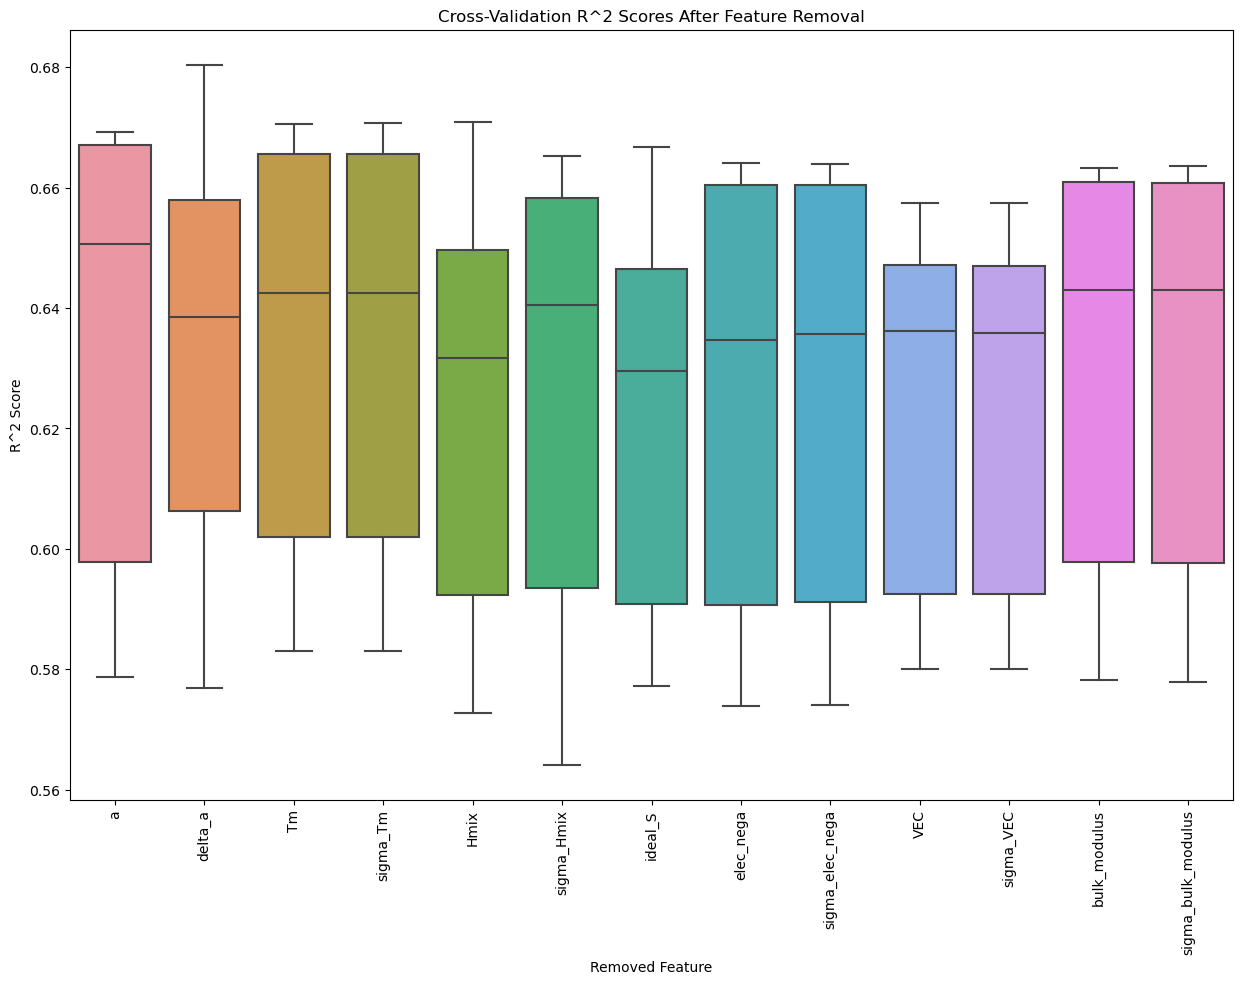

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Part 1: Perform RFE on all features and get feature importance
all_features_H = fixed_features_H + elimination_features_H

rfe = RFECV(RandomForestRegressor(**models_H_best_params, random_state=0), cv=6, scoring='r2', verbose=False, n_jobs=-1)
rfe.fit(X_H_norm_rfe, H1_norm_rfe)

feature_importance = sorted(zip(all_features_H, rfe.ranking_), key=lambda x:x[1])
print("Features from less important to very important:")
for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")


# Part 2: Selectively remove features in elimination_features_H and evaluate model performance
def train_and_evaluate(X, y):
    scores = cross_val_score(RandomForestRegressor(**models_H_best_params, random_state=0), X, y, cv=kf, scoring='r2')
    return scores

performance_dict = {}
for feature in elimination_features_H:
    X_H_norm_rfe_selected = X_H_norm_rfe.drop(feature, axis=1)
    scores = train_and_evaluate(X_H_norm_rfe_selected, H1_norm_rfe)
    performance_dict[feature] = scores
    print(f"Removed feature: {feature}, R^2 scores Mean: {np.mean(scores)}, Std: {np.std(scores)}")


# Part 3: Create a plot to show the cross-validation results
performance_df = pd.DataFrame(performance_dict)
melted_df = pd.melt(performance_df)

plt.figure(figsize=(15,10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=90)
plt.xlabel('Removed Feature')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation R^2 Scores After Feature Removal')
plt.show()


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

# let's deal with model_H first 
fixed_features_H = df_H_compo.columns.tolist()
elimination_features_H = df_H_specific_features.columns.tolist()

df_H_rfe = pd.concat([pd.DataFrame(X1_norm, columns=fixed_features_H), 
                      pd.DataFrame(Y1_norm, columns=elimination_features_H)], axis=1)
H1_norm_rfe = H1_norm.ravel()

# Fit RFECV to all features
all_features_pipeline = Pipeline(steps=[
    ('rfecv', RFECV(estimator=RandomForestRegressor(**models_H_best_params, random_state=0), 
                     cv=6, scoring='r2', verbose=False, n_jobs=-1))
])

all_features_pipeline.fit(df_H_rfe, H1_norm_rfe)


In [ ]:
# Print feature importance
feature_importance = all_features_pipeline.named_steps['rfecv'].estimator_.feature_importances_
print(feature_importance.shape)

feature_names = df_H_rfe.columns
print(feature_names)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


In [26]:

kf = KFold(n_splits=6, random_state=0, shuffle=True)

def train_and_evaluate(X, y, model_name):
    models, scores = [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = RandomForestRegressor(**models_H_best_params, random_state=0)
        model.fit(X_train, y_train)
        models.append(model)
        scores.append(r2_score(y_test, model.predict(X_test)))

    print(f"{model_name} R^2 scores Mean: {np.mean(scores)} Std: {np.std(scores)}")
    return models, scores

# Evaluate performance removing one feature at a time
all_scores = []
for feature in elimination_features_H:
    remaining_features = [f for f in elimination_features_H if f != feature]
    remaining_features += fixed_features_H
    models, scores = train_and_evaluate(df_H_rfe[remaining_features], H1_norm_rfe, f"Model without {feature}")
    all_scores.append(scores)

# Plotting
plt.figure()
plt.boxplot(all_scores, labels=[f"Without {feature}" for feature in elimination_features_H], vert=False)
plt.xlabel("R^2 score")
plt.title("Model performance without each feature")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

# let's deal with model_H first 
fixed_features_H = df_H_compo.columns.tolist()
elimination_features_H = df_H_specific_features.columns.tolist()

df_H_rfe = pd.concat([pd.DataFrame(X1_norm, columns=fixed_features_H), 
                      pd.DataFrame(Y1_norm, columns=elimination_features_H)], axis=1)

# Fit RFECV to the elimination features only, as before.
elimination_pipeline = Pipeline(steps=[
    ('rfecv', RFECV(estimator=RandomForestRegressor(
            **models_H_best_params, random_state=0), cv=6, scoring='r2', verbose=True))
])
elimination_pipeline.fit(df_H_rfe[elimination_features_H], H1_norm_rfe)

# Identify the optimal subset of elimination features
selected_features_mask_H = elimination_pipeline.named_steps['rfecv'].support_
selected_elimination_features_H = np.array(elimination_features_H)[selected_features_mask_H]

print(selected_elimination_features_H)

# Combine the fixed features with the selected elimination features
selected_features_H = fixed_features_H + selected_elimination_features_H.tolist()

# Fit a new RandomForestRegressor to the combined feature set
pipeline_H = Pipeline(steps=[
    ('reg', RandomForestRegressor(
            **models_H_best_params, random_state=0))
])
pipeline_H.fit(df_H_rfe[selected_features_H], H1_norm_rfe)

# Calculate cross-validation scores for the combined feature set
# We need to use cross_val_score here to get the scores across different CV splits
cv_scores = cross_val_score(pipeline_H, df_H_rfe[selected_features_H], H1_norm_rfe, cv=6, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print(f'Mean CV R^2 score: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}')

# We can't directly plot the R^2 score as a function of the number of selected features, since we're only training one model on the combined feature set.
# However, we can plot the R^2 scores across different CV splits, to give a sense of the variability in model performance.
plt.figure()
plt.title("Cross-validation R^2 scores")
plt.xlabel("CV fold")
plt.ylabel("R^2 score")
plt.plot(range(1, 13), cv_scores, 'o-', color='black')
plt.show()


### Feature Importance Calculation by Random Forest

determines and visualizes the importance of features for two datasets (hardness and corrosion), using data from several models, by creating a bar plot with error bars that represent the standard deviation of the calculated importance values.


In [ ]:
# Initialize importance dataframes
df_importance_H, df_importance_C = pd.DataFrame(
    columns=feature_names_H), pd.DataFrame(columns=feature_names_C)

df_permu_importance_train_H, df_permu_importance_train_C = pd.DataFrame(
    columns=feature_names_H), pd.DataFrame(columns=feature_names_C)

# Populate importance dataframes
for i, (model_H, model_C, permu_importance_train_H, permu_importance_train_C) in enumerate(zip(models_H, models_C, permu_importances_train_H, permu_importances_train_C)):

    df_importance_H.loc[i] = model_H.feature_importances_
    df_importance_C.loc[i] = model_C.feature_importances_

    # print(permu_importance_train_H)

    df_permu_importance_train_H = pd.concat([df_permu_importance_train_H, pd.DataFrame(
        permu_importance_train_H.importances_mean.reshape(1, -1), columns=feature_names_H)])
    df_permu_importance_train_C = pd.concat([df_permu_importance_train_C, pd.DataFrame(
        permu_importance_train_C.importances_mean.reshape(1, -1), columns=feature_names_C)])

# display(df_permu_importance_train_H.shape)
# display(df_permu_importance_train_C.shape)

# Calculate mean and std for each feature importance
df_importance_H.loc['mean'], df_importance_H.loc['std'] = df_importance_H.mean(
), df_importance_H.std()
df_importance_C.loc['mean'], df_importance_C.loc['std'] = df_importance_C.mean(
), df_importance_C.std()
df_permu_importance_train_H.loc['mean'], df_permu_importance_train_H.loc['std'] = df_permu_importance_train_H.mean(
), df_permu_importance_train_H.std()
df_permu_importance_train_C.loc['mean'], df_permu_importance_train_C.loc['std'] = df_permu_importance_train_C.mean(
), df_permu_importance_train_C.std()

# Select specific features
df_importance_eng_H = df_importance_H[df_H_specific_features.columns]
df_importance_eng_C = df_importance_C[df_C_specific_features.columns]
df_permu_importance_train_eng_H = df_permu_importance_train_H[df_H_specific_features.columns]
df_permu_importance_train_eng_C = df_permu_importance_train_C[df_C_specific_features.columns]

Visualizes the feature importances derived from tree-based models for 'Hardness' and 'Corrosion' properties, using bar plots with error bars, to facilitate the comparison of feature relevance between the two models.


In [ ]:
# Plot feature importances from tree-based models

# Synchronize feature names with importance data
df_importance_H_full = pd.DataFrame(columns=feature_names_C)
df_importance_H_full = pd.concat([df_importance_H_full, df_importance_H], axis=0)
df_importance_H_full.index = df_importance_H.index

# Prepare plot
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_importance_H_full.columns))

# Data and labels
data = [(df_importance_H_full, 'Hardness'), (df_importance_C, 'Corrosion')]

# Plot data with error bars
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width, df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Label and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by Tree-based Model')

# Set x-axis labels with correct rotation
ax.set_xticks(index)
ax.set_xticklabels(df_importance_H_full.columns, rotation=45, ha='right')

# Add legend
ax.legend()

# Tight layout and display
fig.tight_layout()
plt.show()


In [ ]:
# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_importance_eng_H.columns))

# Define data and labels
data = [(df_importance_eng_H, 'Hardness'),
        (df_importance_eng_C, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by tree-based model')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_importance_eng_H.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

### Permutation Feature Importance


In [ ]:
# Plot permutation feature importances

# match the feature importance with the feature names
df_permu_importance_train_H_full = pd.DataFrame(columns=feature_names_C)
df_permu_importance_train_H_full = pd.concat(
    [df_permu_importance_train_H_full, df_permu_importance_train_H], axis=0)
df_permu_importance_train_H_full.index = df_permu_importance_train_H.index

# display(df_permu_importance_train_H_full)

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_permu_importance_train_H_full.columns))

# Define data and labels
data = [(df_permu_importance_train_H_full, 'Hardness'),
        (df_permu_importance_train_C, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_permu_importance_train_H_full.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

In [ ]:
# Plot permutation feature importances
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_permu_importance_train_eng_H.columns))

# Define data and labels
data = [(df_permu_importance_train_eng_H, 'Hardness'),
        (df_permu_importance_train_eng_C, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_permu_importance_train_eng_H.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

In [ ]:
# Select top N features based on mean importance for both models
N = 8
top_features_H = df_permu_importance_train_eng_H.loc['mean'].nlargest(
    N).index.tolist()
top_features_C = df_permu_importance_train_eng_C.loc['mean'].nlargest(
    N).index.tolist()

# Find common features
common_features = list(set(top_features_H) & set(top_features_C))

print(f"Top {N} features for 'H': {top_features_H}")
print(f"Top {N} features for 'C': {top_features_C}")
print(f"Common features: {common_features}")

In [ ]:
# Start by combining the mean importance data from both models into a single DataFrame
df_permu_importance_train_combined = pd.DataFrame(
    index=['mean_H', 'mean_C'], columns=feature_names_C)

# Assign mean importances to the DataFrame, filling NA values with zero
df_permu_importance_train_combined.loc['mean_H'] = df_permu_importance_train_H_full.loc['mean'].fillna(
    0)
df_permu_importance_train_combined.loc['mean_C'] = df_permu_importance_train_C.loc['mean'].fillna(
    0)

# Normalize the importance scores so that the total sum for each model is 1
df_permu_importance_train_combined.loc['mean_H'] /= df_permu_importance_train_combined.loc['mean_H'].sum()
df_permu_importance_train_combined.loc['mean_C'] /= df_permu_importance_train_combined.loc['mean_C'].sum()

# Create a 'consensus' score, which is the average of the importance scores from the two models
df_permu_importance_train_combined.loc['consensus_score'] = (
    df_permu_importance_train_combined.loc['mean_H'] + df_permu_importance_train_combined.loc['mean_C']) / 2

# Reduce the DataFrame to only the features used in model H
df_permu_importance_train_eng_combined = df_permu_importance_train_combined[df_H_specific_features.columns]

# Sort the features according to the consensus score
df_permu_importance_train_eng_combined_sorted = df_permu_importance_train_eng_combined.sort_values(
    'consensus_score', ascending=False, axis=1)

# Now, let's visualize the sorted feature importances

# Define the figure and the axes
fig, ax = plt.subplots(figsize=(10, 5))

# Set the bar width and calculate the positions of the bars
bar_width = 0.25
index = np.arange(len(df_permu_importance_train_eng_combined_sorted.columns))

# Prepare the data for plotting, along with labels and colors
data = [(df_permu_importance_train_eng_combined_sorted.loc['mean_H'], 'Hardness', 'cornflowerblue'),
        (df_permu_importance_train_eng_combined_sorted.loc['mean_C'], 'Corrosion', 'darkseagreen'),
        (df_permu_importance_train_eng_combined_sorted.loc['consensus_score'], 'Consensus', 'red')]

# Plot each data series as a bar plot
for i, (df, label, color) in enumerate(data):
    ax.bar(index + i*bar_width, df, bar_width, label=label, color=color)

# Set the labels and title for the plot
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation (normalised)')

# Add gridlines to make the plot easier to read
ax.grid(True, linestyle='--', alpha=0.6)

# Set up the x-axis labels and ensure they're readable
ax.set_xticks(index + bar_width)
ax.set_xticklabels(
    df_permu_importance_train_eng_combined_sorted.columns, rotation=45, ha='right')

# Position the legend in a good spot
ax.legend(loc='upper right')

# Make sure everything fits and then show the plot
fig.tight_layout()
plt.show()

### need to do something about the correlation of features


### Recursive Feature Elimination (RFE) - a customised version


In [ ]:
# from sklearn.feature_selection import RFE

# # Let's say these are your full features and you have a list defining the group of features
# # you're interested in, like this:

# all_features_C = np.array(df_C_compo.columns.to_list(
# ) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())  # all features
# # the specific group of features
# group_features_C = np.array(df_C_specific_features.columns.to_list())

# # Get the indices of the group features in the full feature list
# group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]

# # Now extract the subset of X corresponding to group features
# X_C_norm_subset = X_C_norm[:, group_indices_C]

# # Now you can run RFE or any other feature selection method on this subset
# rfe_C = RFE(estimator=forestmodel_C, n_features_to_select=5)
# rfe_C = rfe_C.fit(X_C_norm_subset, C2_norm.ravel())
# X_C_norm_subset_rfe = rfe_C.transform(X_C_norm_subset)

# # Get a mask, or integer index, of the features selected
# selected_features_C = rfe_C.support_

# # Get a list of the feature names selected
# selected_feature_names = group_features_C[selected_features_C]
# print(selected_feature_names)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# import numpy as np

# # Assuming X_train is your feature matrix and y_train are your labels
# # always_include is a list of indices for the features you always want to include

# # replace these with the indices of your features
# always_include_indices = [0, 2, 5]
# include_X_train = X_train[:, always_include_indices]

# # Remaining features for RFE
# rfe_indices = [idx for idx in range(
#     X_train.shape[1]) if idx not in always_include_indices]
# rfe_X_train = X_train[:, rfe_indices]

# # Set up a classifier to use with RFE
# clf = RandomForestClassifier(n_estimators=100)

# # Perform RFE on remaining features
# selector = RFE(clf, n_features_to_select=10, step=1)  # choose your parameters
# selector = selector.fit(rfe_X_train, y_train)

# # Now, we join the always included features with the selected features from RFE
# mask = selector.support_
# selected_rfe_indices = np.array(rfe_indices)[mask]
# selected_indices = np.concatenate(
#     [always_include_indices, selected_rfe_indices])

# # Now you can fit your final model on the selected features
# final_X_train = X_train[:, selected_indices]
# final_clf = RandomForestClassifier(n_estimators=100)
# final_clf.fit(final_X_train, y_train)

### first let's use an example to understand how the RFE works


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate a dummy dataset
X, y = make_regression(n_samples=1000, n_features=6,
                       noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=['A', 'B', 'C', 'D', 'E', 'F'])
df['target'] = y

# Define the fixed features and the features to be eliminated
fixed_features = ['A', 'B']
elimination_features = ['C', 'D', 'E', 'F']

# Define a pipeline for the elimination features
elimination_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('rfecv', RFECV(estimator=LinearRegression(), cv=5, scoring='r2'))
])

# Define a preprocessor that applies the elimination pipeline to the elimination features,
# and applies scaling to the fixed features
preprocessor = ColumnTransformer(transformers=[
    ('elim', elimination_pipeline, elimination_features),
    ('fix', StandardScaler(), fixed_features)
])

# Define the final pipeline that includes preprocessing and model training
pipeline = Pipeline(steps=[
    ('pre', preprocessor),
    ('reg', LinearRegression())
])

# Fit the pipeline to the all data
X_all = df[fixed_features + elimination_features]
y_all = df['target']

pipeline.fit(X_all, y_all)

# Access the selected features
selected_features_mask = pipeline.named_steps['pre'].transformers_[
    0][1].named_steps['rfecv'].support_
print(
    f'Selected features: {np.array(elimination_features)[selected_features_mask]}')

# Plot the R^2 score as a function of the number of selected features
num_features = range(1, len(pipeline.named_steps['pre'].transformers_[
                     0][1].named_steps['rfecv'].cv_results_['mean_test_score']) + 1)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.errorbar(num_features,
             pipeline.named_steps['pre'].transformers_[
                 0][1].named_steps['rfecv'].cv_results_['mean_test_score'],
             yerr=pipeline.named_steps['pre'].transformers_[
                 0][1].named_steps['rfecv'].cv_results_['std_test_score'],
             fmt='o-', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Use the same features and subset
all_features_C = np.array(df_C_compo.columns.to_list(
) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())
group_features_C = np.array(df_C_specific_features.columns.to_list())

group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]
X_C_norm_subset = X_C_norm[:, group_indices_C]

# Create the RFECV object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv_C = RFECV(estimator=forestmodel_C, step=1, cv=KFold(6),
                scoring='neg_mean_squared_error')

rfecv_C.fit(X_C_norm_subset, C2_norm.ravel())

print("Optimal number of features : %d" % rfecv_C.n_features_)

# Get a mask, or integer index, of the features selected
selected_features_C = rfecv_C.support_

# Get a list of the feature names selected
selected_feature_names = group_features_C[selected_features_C]
print(selected_feature_names)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (neg mean squared error)")
plt.plot(range(1, len(rfecv_C.grid_scores_) + 1), rfecv_C.grid_scores_)
plt.show()